[0.00462221+0.j 0.0184388 +0.j 0.04129895+0.j 0.07294902+0.j
 0.11302884+0.j 0.1610661 +0.j 0.21646818+0.j 0.27851068+0.j
 0.34632177+0.j 0.41886117+0.j 0.49489259+0.j 0.57294902+0.j
 0.65129164+0.j 0.7278671 +0.j 0.8002751 +0.j 0.8657714 +0.j
 0.92134796+0.j 0.96394246+0.j 0.9908085 +0.j 2.        +0.j
 3.0091915 +0.j 3.03605754+0.j 3.07865204+0.j 3.1342286 +0.j
 3.1997249 +0.j 3.2721329 +0.j 3.34870836+0.j 3.42705098+0.j
 3.50510741+0.j 3.58113883+0.j 3.65367823+0.j 3.72148932+0.j
 3.78353182+0.j 3.8389339 +0.j 3.88697116+0.j 3.92705098+0.j
 3.95870105+0.j 3.9815612 +0.j 3.99537779+0.j]
[[ 0.00876521-0.j  0.03497981-0.j  0.04361022-0.j ...  0.06070898-0.j
   0.03497981-0.j  0.02629563-0.j]
 [ 0.01743532+0.j  0.0690983 +0.j  0.0854699 +0.j ... -0.11692716+0.j
  -0.0690983 +0.j -0.05230596+0.j]
 [-0.02591395+0.j -0.10151536+0.j -0.12392085+0.j ... -0.16445094+0.j
  -0.10151536+0.j -0.07774185+0.j]
 ...
 [ 0.02591395+0.j -0.10151536+0.j  0.12392085+0.j ...  0.16445094+0.j
  -0.10151536+

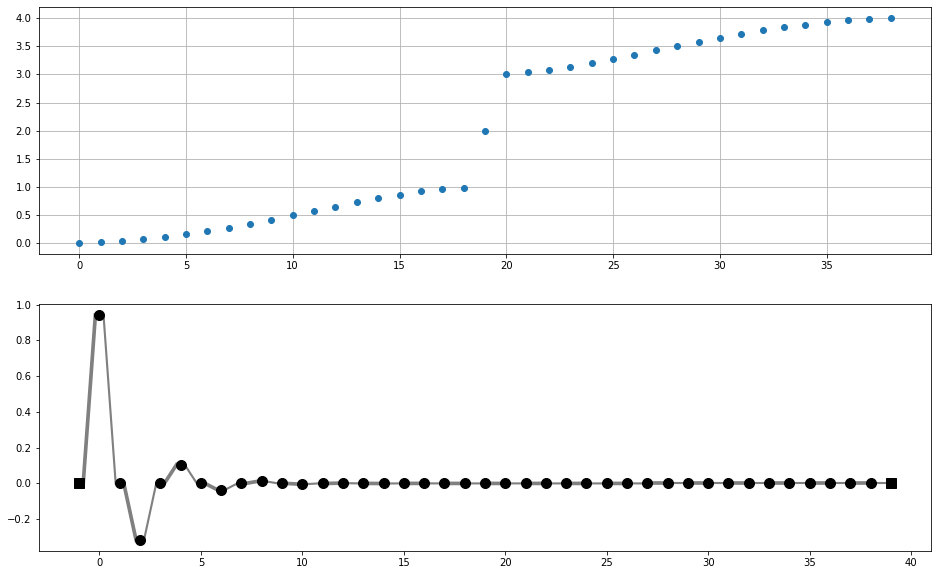

In [1]:
## 両端が固定端の場合 ##
# 質量を変えた場合の固体端との境界では、トポロジカルなエッジモードが存在しない

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
import sys

## パラメータ設定 ##
delta_m = 0.5    # -1 < delta_m < 1
delta_k = 0.5    # -1 < delta_k < 1
m0 = 1            # 基準の質量
m1 = 1/(1 - delta_m)  # 質量1
m2 = 1/(1 + delta_m)  # 質量2
k0 = 1            # 基準のバネ定数
k1 = 1 + delta_k  # バネ1
k2 = 1 - delta_k  # バネ2
m_list = [m0]*39  # 質量を並べたリスト
k_list = [k1,k2]*20  # バネ定数を並べたリスト、要素数は質量リストよりもひとつ多い
N = len(m_list)  # 質量の配列から行列サイズNを求める

## 質量の対角行列Mを定義 ##
M = np.zeros((N, N), dtype = np.complex128)
i = 0
while i < N:
    M[i][i] = m_list[i]
    i += 1
    
## バネ定数の行列Kを定義 ##
K = np.zeros((N, N), dtype = np.complex128)
i = 1
while i < N:
    K[i][i] = k_list[i] + k_list[i-1]
    K[i][i-1] = -k_list[i]
    K[i-1][i] = -k_list[i]
    i += 1
K[0][0] = k_list[1] + k_list[0]

## 固有値方程式を解く ##
M_inv = np.linalg.inv(M)  # Mの逆行列
eigen_value, eigen_vector = np.linalg.eig(np.dot(M_inv, K))  # 固有値方程式を解く
eigen_id = np.argsort(eigen_value)  # 固有値が小さい順にソートしたindexを取得
eigen_value = eigen_value[eigen_id]  # ソートした固有値、角周波数の２乗に対応
eigen_vector = eigen_vector.T[eigen_id]   # ソートした固有ベクトル、複素数表示した変位に対応
print(eigen_value)

## グラフを色分けして表示するための配列の準備 ##
m0_bool = np.where(np.array(m_list) == m0)[0]
m1_bool = np.where((np.array(m_list) != m0) & (np.array(m_list) == m1))[0]  # m1だとTrue
m2_bool = np.where((np.array(m_list) != m0) & (np.array(m_list) == m2))[0]  # m2だとTrue
m0_id = np.arange(N)[m0_bool]  # m0のindex
m1_id = np.arange(N)[m1_bool]  # m1のindex
m2_id = np.arange(N)[m2_bool]  # m2のindex
m0_disp = (eigen_vector.T[m0_bool]).T  # 変位の固有ベクトルからm0のみを抽出
m1_disp = (eigen_vector.T[m1_bool]).T  # 変位の固有ベクトルからm1のみを抽出
m2_disp = (eigen_vector.T[m2_bool]).T  # 変位の固有ベクトルからm2のみを抽出
k0_bool = np.where(np.array(k_list) == k0)[0]  # k1だとTrue
k1_bool = np.where((np.array(k_list) != k0) & (np.array(k_list) == k1))[0]  # k1だとTrue
k2_bool = np.where((np.array(k_list) != k0) & (np.array(k_list) == k2))[0]  # k2でなければTrue
k0_id = np.array([np.arange(N+1)[k0_bool]-1+0.2, np.arange(N+1)[k0_bool]-0.2])  # [固有値index, バネの左と右の変位]
k1_id = np.array([np.arange(N+1)[k1_bool]-1+0.2, np.arange(N+1)[k1_bool]-0.2])  # [固有値index, バネの左と右の変位]
k2_id = np.array([np.arange(N+1)[k2_bool]-1+0.2, np.arange(N+1)[k2_bool]-0.2])
eigen_vector_left = np.hstack((np.zeros((N,1)), eigen_vector))  # 固定端を表すため変位ベクトルの左側に0を足す
eigen_vector_right = np.hstack((eigen_vector, np.zeros((N,1))))  # 固定端を表すため変位ベクトルの右側に0を足す
k0_disp = np.array([eigen_vector_left.T[k0_bool], eigen_vector_right.T[k0_bool]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]
k1_disp = np.array([eigen_vector_left.T[k1_bool], eigen_vector_right.T[k1_bool]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]
k2_disp = np.array([eigen_vector_left.T[k2_bool], eigen_vector_right.T[k2_bool]]).transpose(2,0,1)

print(m0_disp)

## 可視化  ##
fig, axs = plt.subplots(2, figsize=(16,10))
axs[0].plot(eigen_value.real, 'o')
axs[0].grid()
axs[1].plot(k0_id, k0_disp[19].real, 'gray', linewidth=3)
axs[1].plot(k1_id, k1_disp[19].real, 'gray', linewidth=3*(1+delta_k)**(1/2))
axs[1].plot(k2_id, k2_disp[19].real, 'gray', linewidth=3*(1-delta_k)**(1/2))
axs[1].plot(m0_id, m0_disp[19].real, "o", color='black', markersize=10)
axs[1].plot(m1_id, m1_disp[19].real, "o", color='black', markersize=10*(1+delta_m)**(1/3))
axs[1].plot(m2_id, m2_disp[19].real, "o", color='black', markersize=10*(1-delta_m)**(1/3))
axs[1].plot([-1,N],[0,0], 'sk', markersize=10)
plt.show()


In [2]:
eigen_vector.shape
print(K.shape)
print(M.shape)

(39, 39)
(39, 39)


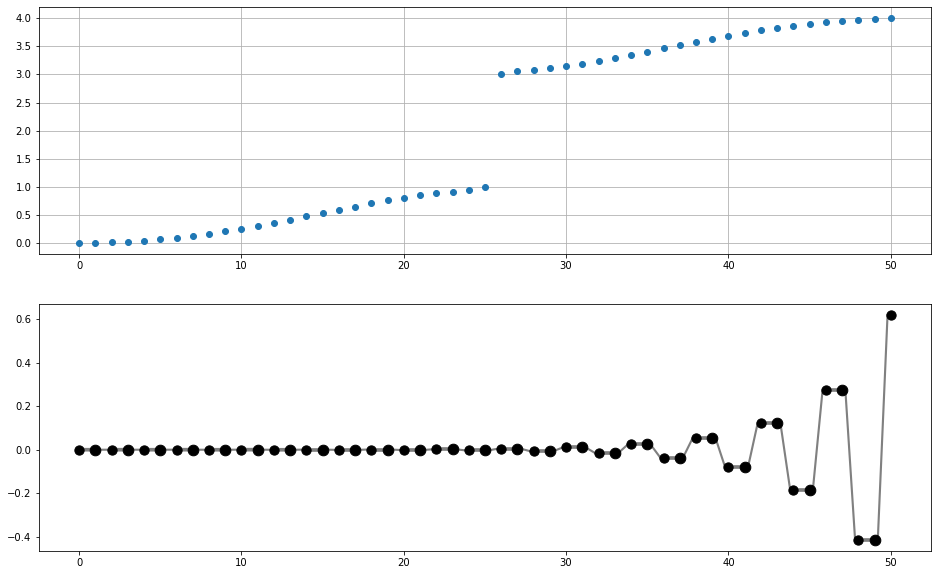

In [3]:
## 両端が自由端の場合 ##

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
import sys

## パラメータ設定 ##
delta_m = -0.2    # -1 < delta_m < 1
delta_k = 0.5    # -1 < delta_k < 1
m0 = 1            # 基準の質量
m1 = 1/(1 - delta_m)  # 質量1
m2 = 1/(1 + delta_m)  # 質量2
k0 = 1            # 基準のバネ定数
k1 = 1 + delta_k  # バネ1
k2 = 1 - delta_k  # バネ2
m_list = [m1, m2]*25+[m1]  # 質量を並べたリスト
k_list = [k1, k2]*25  # バネ定数を並べたリスト、要素数は質量リストよりもひとつ少ない
N = len(m_list)  # 質量の配列から行列サイズNを求める

## 質量の対角行列Mを定義 ##
M = np.zeros((N, N), dtype = np.complex128)
i = 0
while i < N:
    M[i][i] = m_list[i]
    i += 1

## バネ定数の行列Kを定義 ##
K = np.zeros((N, N), dtype = np.complex128)
i = 1
while i < N-1:
    K[i][i] = k_list[i-1] + k_list[i]
    K[i][i-1] = -k_list[i-1]
    K[i-1][i] = -k_list[i-1]
    i += 1
K[0][0] = k_list[0]
K[N-1][N-1] = k_list[N-2]
K[N-1][N-2] = -k_list[N-2]
K[N-2][N-1] = -k_list[N-2]

## 固有値方程式を解く ##
M_inv = np.linalg.inv(M)  # Mの逆行列
eigen_value, eigen_vector = np.linalg.eig(np.dot(M_inv, K))  # 固有値方程式を解く
eigen_id = np.argsort(eigen_value)  # 固有値が小さい順にソートしたindexを取得
eigen_value = eigen_value[eigen_id]  # ソートした固有値、角周波数の２乗に対応
eigen_vector = eigen_vector.T[eigen_id]   # ソートした固有ベクトル、複素数表示した変位に対応

## グラフを色分けして表示するための配列の準備 ##
m0_bool = np.where(np.array(m_list) == m0)[0]
m1_bool = np.where((np.array(m_list) != m0) & (np.array(m_list) == m1))[0]  # m1だとTrue
m2_bool = np.where((np.array(m_list) != m0) & (np.array(m_list) == m2))[0]  # m2だとTrue
m0_id = np.arange(N)[m0_bool]  # m0のindex
m1_id = np.arange(N)[m1_bool]  # m1のindex
m2_id = np.arange(N)[m2_bool]  # m2のindex
m0_disp = (eigen_vector.T[m0_bool]).T  # 変位の固有ベクトルからm0のみを抽出
m1_disp = (eigen_vector.T[m1_bool]).T  # 変位の固有ベクトルからm1のみを抽出
m2_disp = (eigen_vector.T[m2_bool]).T  # 変位の固有ベクトルからm2のみを抽出
k0_bool = np.where(np.array(k_list) == k0)[0]  # k1だとTrue
k1_bool = np.where((np.array(k_list) != k0) & (np.array(k_list) == k1))[0]  # k1だとTrue
k2_bool = np.where((np.array(k_list) != k0) & (np.array(k_list) == k2))[0]  # k2でなければTrue
k0_id = np.array([np.arange(N)[k0_bool]+0.2, np.arange(N)[k0_bool]+1-0.2])  # [固有値index, バネの左と右の変位]
k1_id = np.array([np.arange(N)[k1_bool]+0.2, np.arange(N)[k1_bool]+1-0.2])  # [固有値index, バネの左と右の変位]
k2_id = np.array([np.arange(N)[k2_bool]+0.2, np.arange(N)[k2_bool]+1-0.2])
eigen_vector_left = eigen_vector  # 自由端
eigen_vector_right = eigen_vector  # 自由端
k0_disp = np.array([eigen_vector_left.T[k0_bool], eigen_vector_right.T[k0_bool+1]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]
k1_disp = np.array([eigen_vector_left.T[k1_bool], eigen_vector_right.T[k1_bool+1]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]
k2_disp = np.array([eigen_vector_left.T[k2_bool], eigen_vector_right.T[k2_bool+1]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]

## 可視化  ##
fig, axs = plt.subplots(2, figsize=(16,10))
axs[0].plot(eigen_value.real, 'o')
axs[0].grid()
axs[1].plot(k0_id, k0_disp[25].real, 'gray', linewidth=3)
axs[1].plot(k1_id, k1_disp[25].real, 'gray', linewidth=3*(1+delta_k)**(1/2))
axs[1].plot(k2_id, k2_disp[25].real, 'gray', linewidth=3*(1-delta_k)**(1/2))
axs[1].plot(m0_id, m0_disp[25].real, "o", color='black', markersize=10)
axs[1].plot(m1_id, m1_disp[25].real, "o", color='black', markersize=10*(1+delta_m)**(1/3))
axs[1].plot(m2_id, m2_disp[25].real, "o", color='black', markersize=10*(1-delta_m)**(1/3))
plt.show()


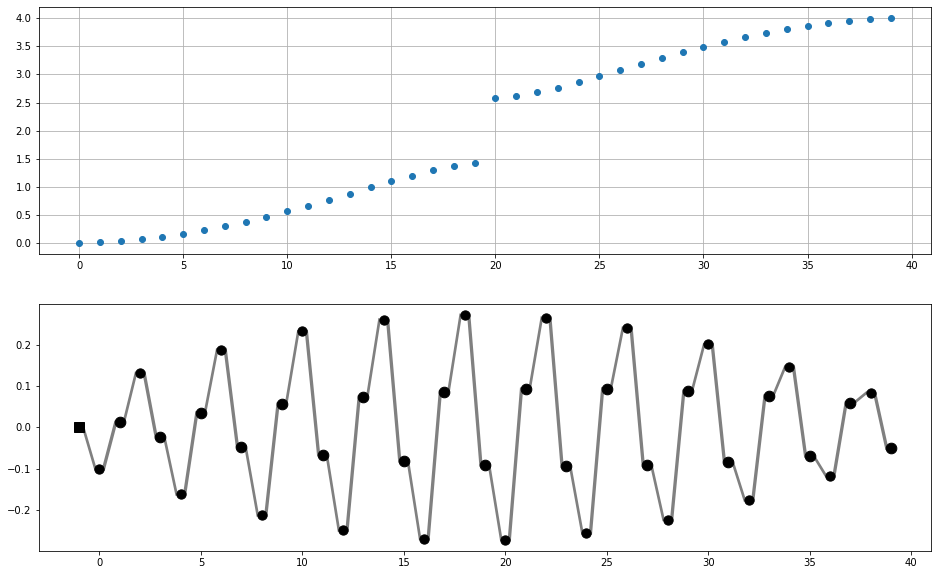

In [4]:
## 左側が固定端、右側が自由端の場合 ##

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
import sys

## パラメータ設定 ##
delta_m = -0.2    # -1 < delta_m < 1
delta_k = -0.2    # -1 < delta_k < 1
m0 = 1            # 基準の質量
m1 = 1/(1 - delta_m)  # 質量1
m2 = 1/(1 + delta_m)  # 質量2
k0 = 1            # 基準のバネ定数
k1 = 1 + delta_k  # バネ1
k2 = 1 - delta_k  # バネ2
m_list = [m1, m2]*20  # 質量を並べたリスト
k_list = [k1, k2]*20  # バネ定数を並べたリスト、要素数は質量リストと同じ
N = len(m_list)  # 質量の配列から行列サイズNを求める

## 質量の対角行列Mを定義 ##
M = np.zeros((N, N), dtype = np.complex128)
i = 0
while i < N:
    M[i][i] = m_list[i]
    i += 1

## バネ定数の行列Kを定義 ##
K = np.zeros((N, N), dtype = np.complex128)
i = 1
while i < N:
    K[i][i] = k_list[i] + k_list[i-1]
    K[i][i-1] = -k_list[i]
    K[i-1][i] = -k_list[i]
    i += 1
K[0][0] = k_list[0] + k_list[1]
K[N-1][N-1] = k_list[N-1]

## 固有値方程式を解く ##
M_inv = np.linalg.inv(M)  # Mの逆行列
eigen_value, eigen_vector = np.linalg.eig(np.dot(M_inv, K))  # 固有値方程式を解く
eigen_id = np.argsort(eigen_value)  # 固有値が小さい順にソートしたindexを取得
eigen_value = eigen_value[eigen_id]  # ソートした固有値、角周波数の２乗に対応
eigen_vector = eigen_vector.T[eigen_id]   # ソートした固有ベクトル、複素数表示した変位に対応

## グラフを色分けして表示するための配列の準備 ##
m1_bool = np.where(np.array(m_list) == m1)[0]  # m1だとTrue
m2_bool = np.where(np.array(m_list) != m1)[0]  # m1でなければTrue
m1_id = np.arange(N)[m1_bool]  # m1のindex
m2_id = np.arange(N)[m2_bool]  # m2のindex
m1_disp = (eigen_vector.T[m1_bool]).T  # 変位の固有ベクトルからm1のみを抽出
m2_disp = (eigen_vector.T[m2_bool]).T  # 変位の固有ベクトルからm2のみを抽出
k1_bool = np.where(np.array(k_list) == k1)[0]  # k1だとTrue
k2_bool = np.where(np.array(k_list) != k1)[0]  # k2でなければTrue
k1_id = np.array([np.arange(N+1)[k1_bool]-1, np.arange(N+1)[k1_bool]])  # [固有値index, バネの左と右の変位]
k2_id = np.array([np.arange(N+1)[k2_bool]-1, np.arange(N+1)[k2_bool]])
eigen_vector_left = np.hstack((np.zeros((N,1)), eigen_vector))  # 固定端を表すため変位ベクトルの左側に0を足す
eigen_vector_right = np.hstack((eigen_vector, np.zeros((N,1))))  # 固定端を表すため変位ベクトルの右側に0を足す
k1_disp = np.array([eigen_vector_left.T[k1_bool], eigen_vector_right.T[k1_bool]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]
k2_disp = np.array([eigen_vector_left.T[k2_bool], eigen_vector_right.T[k2_bool]]).transpose(2,0,1)

## グラフを色分けして表示するための配列の準備 ##
m0_bool = np.where(np.array(m_list) == m0)[0]
m1_bool = np.where((np.array(m_list) != m0) & (np.array(m_list) == m1))[0]  # m1だとTrue
m2_bool = np.where((np.array(m_list) != m0) & (np.array(m_list) == m2))[0]  # m2だとTrue
m0_id = np.arange(N)[m0_bool]  # m0のindex
m1_id = np.arange(N)[m1_bool]  # m1のindex
m2_id = np.arange(N)[m2_bool]  # m2のindex
m0_disp = (eigen_vector.T[m0_bool]).T  # 変位の固有ベクトルからm0のみを抽出
m1_disp = (eigen_vector.T[m1_bool]).T  # 変位の固有ベクトルからm1のみを抽出
m2_disp = (eigen_vector.T[m2_bool]).T  # 変位の固有ベクトルからm2のみを抽出
k0_bool = np.where(np.array(k_list) == k0)[0]  # k1だとTrue
k1_bool = np.where((np.array(k_list) != k0) & (np.array(k_list) == k1))[0]  # k1だとTrue
k2_bool = np.where((np.array(k_list) != k0) & (np.array(k_list) == k2))[0]  # k2でなければTrue
k0_id = np.array([np.arange(N+1)[k0_bool]-1+0.2, np.arange(N+1)[k0_bool]-0.2])  # [固有値index, バネの左と右の変位]
k1_id = np.array([np.arange(N+1)[k1_bool]-1+0.2, np.arange(N+1)[k1_bool]-0.2])  # [固有値index, バネの左と右の変位]
k2_id = np.array([np.arange(N+1)[k2_bool]-1+0.2, np.arange(N+1)[k2_bool]-0.2])
eigen_vector_left = np.hstack((np.zeros((N,1)), eigen_vector))  # 固定端を表すため変位ベクトルの左側に0を足す
eigen_vector_right = np.hstack((eigen_vector, np.zeros((N,1))))  # 変位ベクトルの右側に0を足す
k0_disp = np.array([eigen_vector_left.T[k0_bool], eigen_vector_right.T[k0_bool]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]
k1_disp = np.array([eigen_vector_left.T[k1_bool], eigen_vector_right.T[k1_bool]]).transpose(2,0,1)  # [固有値index, バネの左と右, 変位]
k2_disp = np.array([eigen_vector_left.T[k2_bool], eigen_vector_right.T[k2_bool]]).transpose(2,0,1)

## 可視化  ##
fig, axs = plt.subplots(2, figsize=(16,10))
axs[0].plot(eigen_value.real, 'o')
axs[0].grid()
axs[1].plot(k0_id, k0_disp[20].real, 'gray', linewidth=3)
axs[1].plot(k1_id, k1_disp[20].real, 'gray', linewidth=3*(1+delta_k)**(1/2))
axs[1].plot(k2_id, k2_disp[20].real, 'gray', linewidth=3*(1-delta_k)**(1/2))
axs[1].plot(m0_id, m0_disp[20].real, "o", color='black', markersize=10)
axs[1].plot(m1_id, m1_disp[20].real, "o", color='black', markersize=10*(1+delta_m)**(1/3))
axs[1].plot(m2_id, m2_disp[20].real, "o", color='black', markersize=10*(1-delta_m)**(1/3))
axs[1].plot([-1],[0], 'sk', markersize=10)
plt.show()

# 周期がずれた境界には界面モードが立つ